In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Marge Dataframe

In [4]:
jan = pd.read_csv('sales/Sales_January_2019.csv')
jan['month'] = 'jan'

feb = pd.read_csv('sales/Sales_February_2019.csv')
feb['month'] = 'feb'

mar = pd.read_csv('sales/Sales_March_2019.csv')
mar['month'] = 'mar'

apr = pd.read_csv('sales/Sales_April_2019.csv')
apr['month'] = 'apr'

may = pd.read_csv('sales/Sales_May_2019.csv')
may['month'] = 'may'

june = pd.read_csv('sales/Sales_June_2019.csv')
june['month'] = 'june'

july = pd.read_csv('sales/Sales_July_2019.csv')
july['month'] = 'july'

aug = pd.read_csv('sales/Sales_August_2019.csv')
aug['month'] = 'aug'

sep = pd.read_csv('sales/Sales_September_2019.csv')
sep['month'] = 'sep'

oct = pd.read_csv('sales/Sales_October_2019.csv')
oct['month'] = 'oct'

nov = pd.read_csv('sales/Sales_November_2019.csv')
nov['month'] = 'nov'

dec = pd.read_csv('sales/Sales_December_2019.csv')
dec['month'] = 'dec'




In [6]:
list = [jan, feb, mar, apr, may, june, july, aug, sep, oct, nov, dec]

In [7]:
for i in list:
    print(i.shape)

(9723, 7)
(12036, 7)
(15226, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [9]:
frame = pd.concat(list, ignore_index=True)
frame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec


## Data Discovering

In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [12]:
frame.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64

In [14]:
frame.duplicated().sum()

1140

In [15]:
frame.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
month                   12
dtype: int64

In [18]:
frame['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

## Data Cleaning

In [19]:
frame.columns = [col.lower() for col in frame]
frame.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'month'],
      dtype='object')

In [28]:
frame.rename(columns={
        'order id' : 'order_id',
        'quantity ordered' : 'quantity_ordered', 
        'price each' : 'price_each',
        'order date' : 'order_date', 
        'purchase address' : 'purchase_address'
    }, inplace=True
)

In [29]:
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec


In [31]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [38]:
# important
( frame.isnull().sum().sum() ) / len(frame) * 100

1.75006689858175

In [39]:
frame = frame.dropna()

In [40]:
frame.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
dtype: int64

In [41]:
# important
frame = frame.astype({'quantity_ordered' : int, 'price_each' : float})


ValueError: invalid literal for int() with base 10: 'Quantity Ordered': Error while type casting for column 'quantity_ordered'

In [43]:
frame['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [44]:
frame['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [47]:
frame[frame['price_each'] == 'Price Each']['price_each'].count()

355

In [48]:
frame[frame['quantity_ordered'] == 'Quantity Ordered']['quantity_ordered'].count()

355

In [51]:
frame = frame[frame['price_each'] != 'Price Each']
frame = frame[frame['quantity_ordered'] != 'Quantity Ordered']

In [52]:
frame['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [53]:
frame['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [54]:
# important
frame = frame.astype({'quantity_ordered' : int, 'price_each' : float})

In [56]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int32  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 10.6+ MB


## Data Analysis

### questions:

ما أففضل شهر للمبيعات؟ و كم ربح ذلك الشهر؟
ما المدينة التي بيع لها أكثر المنتجات؟ 
ما المنتج الذي تم بيعه أكثر؟
ما الوقت الذي يجب أن نعرض فيه الإعلانات لزيادة احتمالية شراء العملاء للمنتجات؟

ما أففضل شهر للمبيعات؟ و كم ربح ذلك الشهر؟ 

In [62]:
frame['sales'] = frame['quantity_ordered'] * frame['price_each']
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99


In [68]:
month_sales = frame.groupby('month')['sales'].agg(sales_sum= 'sum').sort_values(by= 'sales_sum', ascending= False).reset_index()
month_sales

,month,sales_sum
0,dec,4619297.12
1,oct,3736884.05
2,apr,3396059.11
3,nov,3198909.23
4,may,3144584.80
5,mar,2809063.30
6,july,2646899.69
7,june,2578293.30
8,aug,2244412.31
9,feb,2203481.24


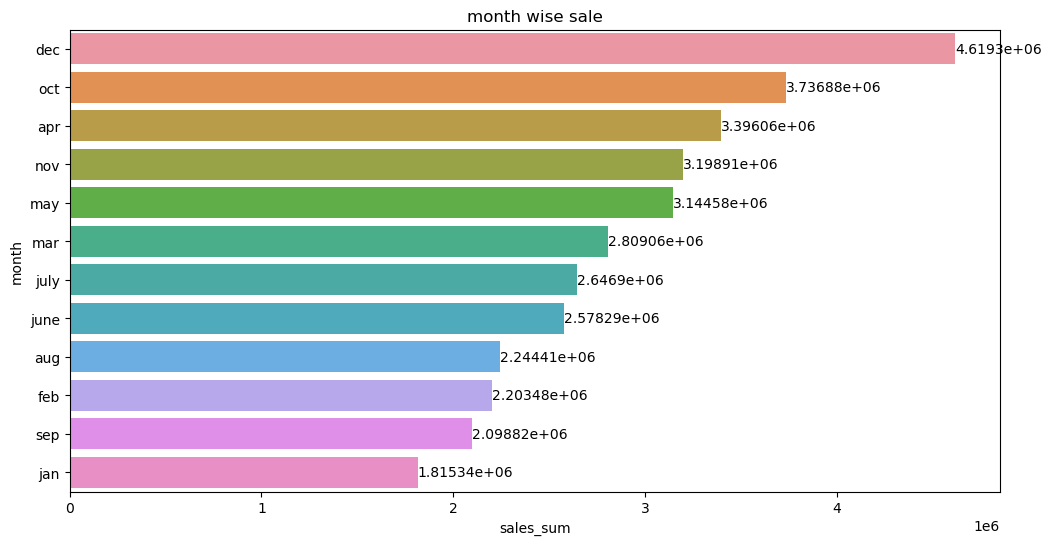

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data= month_sales, y='month', x='sales_sum')
plt.title('month wise sale')
ax.bar_label(ax.containers[0])
plt.show()

ما المدينة التي بيع لها أكثر المنتجات؟ 

In [77]:
def get_city(address):
    return address.split(',')[1].strip(" ")

def get_State(address):
    return address.split(',')[2].split(" ")[1]

frame['city'] = frame['purchase_address'].apply(lambda x: get_city(x) + ' (' + get_State(x) + ')')
frame
    

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99,Dallas (TX)


In [82]:
city_sales = frame.groupby('city')['sales'].agg(city_sales= 'sum').sort_values(by='city_sales' ,ascending=False).reset_index()
city_sales

,city,city_sales
0,San Francisco (CA),8262203.91
1,Los Angeles (CA),5452570.80
2,New York City (NY),4664317.43
3,Boston (MA),3661642.01
4,Atlanta (GA),2795498.58
5,Dallas (TX),2767975.40
6,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
8,Austin (TX),1819581.75
9,Portland (ME),449758.27


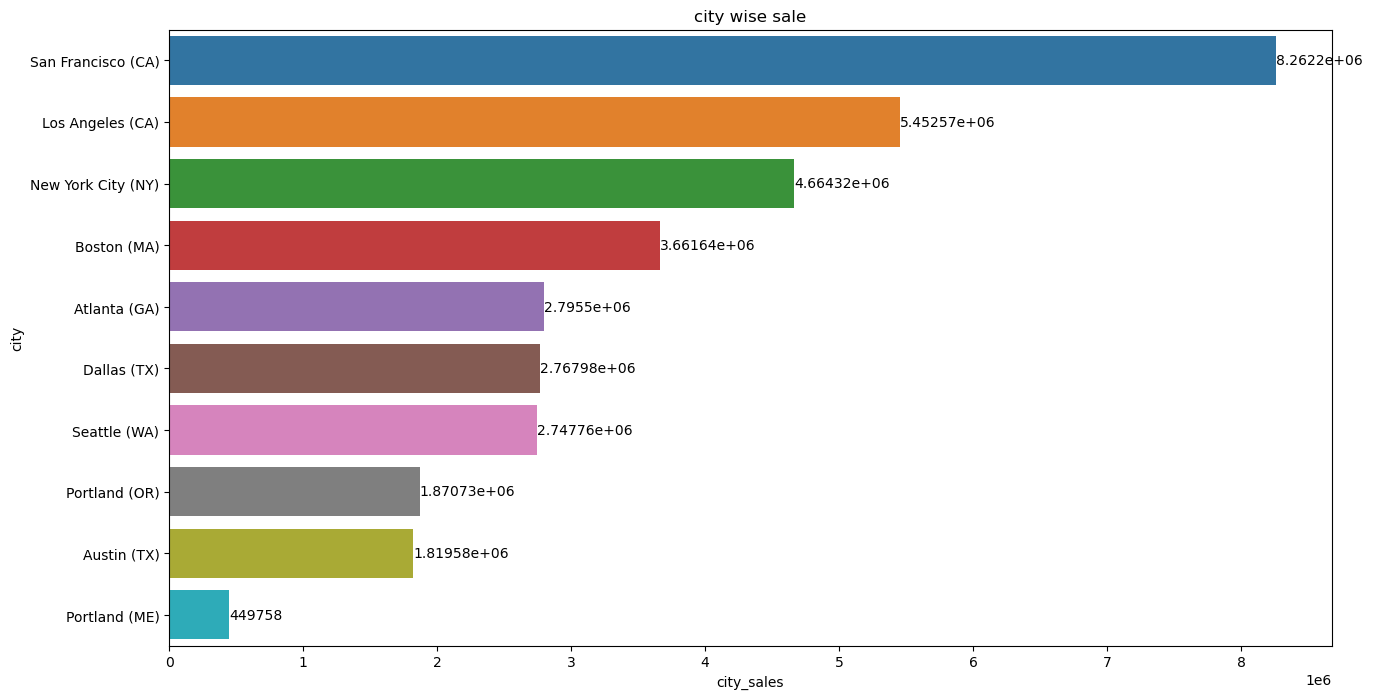

In [85]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='city_sales', y='city', data=city_sales)
plt.title('city wise sale')
ax.bar_label(ax.containers[0])
plt.show()

ما المنتج الذي تم بيعه أكثر؟

In [88]:
product_seales = frame.groupby('product')['quantity_ordered'].agg(quantity_order= 'sum').sort_values(by='quantity_order', ascending=False).reset_index()
product_seales


,product,quantity_order
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


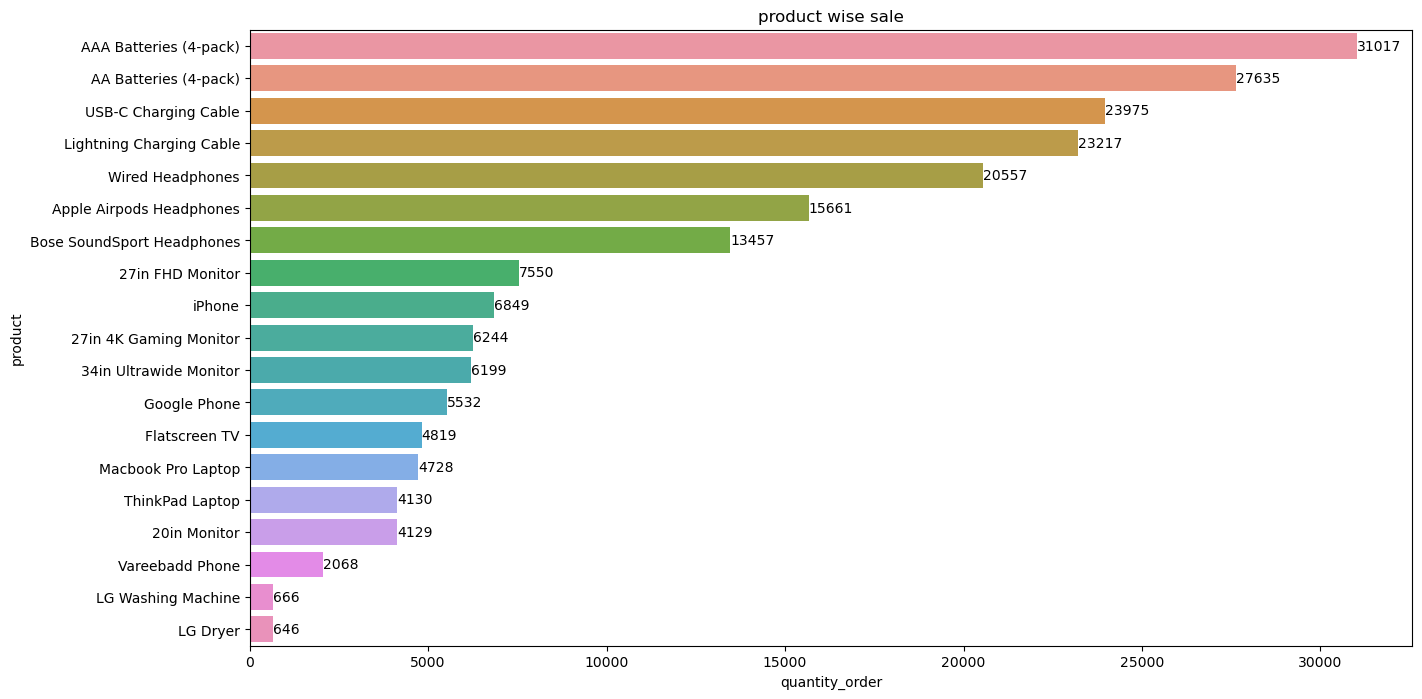

In [89]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='quantity_order', y='product', data=product_seales)
plt.title('product wise sale')
ax.bar_label(ax.containers[0])
plt.show()

ما الوقت الذي يجب أن نعرض فيه الإعلانات لزيادة احتمالية شراء العملاء للمنتجات؟

In [90]:
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99,Dallas (TX)


In [91]:
time_sales = frame
list_time = []

for i in time_sales['order_date']:
    list_time.append(i.split(' ')[1])

time_sales['time'] = list_time
time_sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00,Boston (MA),21:25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95,Portland (OR),14:15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98,San Francisco (CA),13:33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99,Los Angeles (CA),20:33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99,Austin (TX),11:59


In [94]:
time_sales = frame.groupby('time')['sales'].agg(time_sales= 'sum').sort_values(by= 'time_sales',ascending=False).reset_index()

In [95]:
time_sales


,time,time_sales
0,19:01,54503.14
1,12:21,54181.96
2,19:16,54156.39
3,20:13,53149.51
4,19:20,52903.41
...,...,...
1435,02:50,381.99
1436,03:57,317.63
1437,04:05,277.72
1438,03:59,177.29


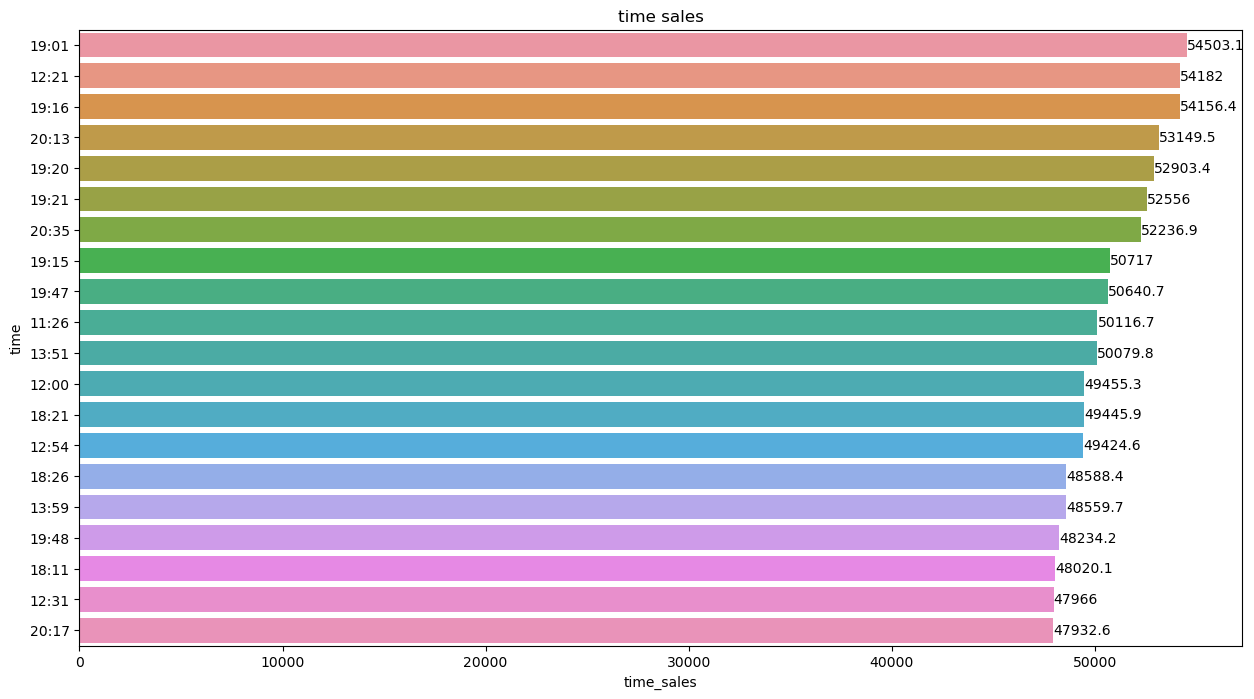

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='time_sales', y='time', data=time_sales.head(20))
plt.title('time sales')
ax.bar_label(ax.containers[0])
plt.show()

In [99]:
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",jan,700.00,Boston (MA),21:25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",jan,14.95,Portland (OR),14:15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",jan,23.98,San Francisco (CA),13:33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",jan,149.99,Los Angeles (CA),20:33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",jan,11.99,Austin (TX),11:59
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95,San Francisco (CA),20:58
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68,Los Angeles (CA),12:01
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00,Seattle (WA),06:43
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99,Dallas (TX),10:39


عدد القطع التي بيعت في هذه الأوقات؟

In [105]:
top_sales = time_sales.head(20)
quantity_sales_top_time_sales = frame[frame['time'].isin(top_sales['time'])].groupby('time')['quantity_ordered'].agg(quantity_sales_top_time_sales= 'sum').sort_values(by='quantity_sales_top_time_sales',ascending=False).reset_index()
quantity_sales_top_time_sales

,time,quantity_sales_top_time_sales
0,19:20,281
1,20:35,270
2,12:21,270
3,20:13,269
4,19:01,269
5,11:26,268
6,19:48,267
7,13:51,266
8,19:47,261
9,19:15,260
